## 1. Pytorch Basics

In [1]:
import torch
import numpy as np

In [2]:
data=np.array([1,2,3,4,5,6,7,8]).astype("double")

#### Fout types
* 1> Tensor class constructor
* 2,3,4> Factory functions

In [3]:
torch.Tensor(data) # copy
torch.tensor(data) # copy
torch.as_tensor(data) # share
torch.from_numpy(data) # share

tensor([1., 2., 3., 4., 5., 6., 7., 8.], dtype=torch.float64)

Numer of elments in a tensor

In [4]:
t=torch.tensor(data)
torch.tensor(t.shape).prod() #1
t.numel()  #2
# 1 & 2 are same

8

#### Reshape and squeze

In [5]:
t.reshape(2,-1) # -1 will find out the factor
t.squeeze() # flatten it out

tensor([1., 2., 3., 4., 5., 6., 7., 8.], dtype=torch.float64)

Create batch of tensors using stack

In [6]:
t1=torch.tensor([[1,2,3],
             [2,3,5],
             [6,8,9],
            [0,3,1]])
t2=torch.tensor([[1,0,3],
             [0,3,1],
             [6,6,9],
            [6,8,9]])
t3=torch.tensor([[5,2,6],
             [2,3,5],
             [5,5,9],
            [6,6,9]])

In [7]:
t4=torch.stack((t1,t2,t3))
t4.shape

torch.Size([3, 4, 3])

In [8]:
t4.reshape([3,1,4,3]) # this will create color channel to the each image of stack
# stack >> color channel >> dim1 >> dim2 

tensor([[[[1, 2, 3],
          [2, 3, 5],
          [6, 8, 9],
          [0, 3, 1]]],


        [[[1, 0, 3],
          [0, 3, 1],
          [6, 6, 9],
          [6, 8, 9]]],


        [[[5, 2, 6],
          [2, 3, 5],
          [5, 5, 9],
          [6, 6, 9]]]])

Flatten the batch <br />
We have to flatten each image while still maintaining batch axis

In [9]:
t4.flatten(start_dim=1) # Batch size=3

tensor([[1, 2, 3, 2, 3, 5, 6, 8, 9, 0, 3, 1],
        [1, 0, 3, 0, 3, 1, 6, 6, 9, 6, 8, 9],
        [5, 2, 6, 2, 3, 5, 5, 5, 9, 6, 6, 9]])

In [10]:
# Elementwise operation "+" "-" (important topic: broadcasting)
t1=torch.tensor([[1,2],
                [2,3]],dtype=torch.float32)
t2=torch.tensor([[1,2]],dtype=torch.float32)
t1+t2

tensor([[2., 4.],
        [3., 5.]])

##### Tensor reduction operation

In [11]:
t1=torch.tensor([[1,2],
                [2,3],
                [5,6]],dtype=torch.float32)
t1.sum()
t1.prod()
t1.mean()
t1.std()

tensor(1.9408)

In [12]:
t1=torch.tensor([[1,2],
                [2,3],
                [5,6]],dtype=torch.float32)
t1.sum(dim=0)
t1.sum(dim=1)


tensor([ 3.,  5., 11.])

In [13]:
t1.max()

tensor(6.)

In [14]:
t1.argmax() ## after flatenning

tensor(5)

## 2. MNIST dataset and Fashion MNIST

Modified National Institute of Standard and Technology
Fashion MNIST: Zalando.com (German based)

Process:
1. Prepare the data
2. Build model
3. Train Model
4. Analyze model result

### 2.1 Prepare the data

---
ETL: Extract > Transform > Load: Two casses to do that 1. Dataset and 2. DataLoader
____

Dataloader: Wraps a dataset and provides access to the underlying data <br />
Dataset: abstrtact class to represent data

###### Torchvision package
* Datasets (like MNIST)
* Transforms
* Models
* Utils

In [15]:
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt

In [16]:
### Extract and Transform operation

# root: where data is located on the disc
# train: for training data
# transform: transform it to tensor
train=torchvision.datasets.FashionMNIST(root="./data/FashionMNIST",train=True,download=True,
                                       transform=transforms.Compose([transforms.ToTensor()]))

In [17]:
type(train[10000])

tuple

In [18]:
## Load data

# Wraps a dataset and provides access to the underlying data and many other capabilities
t_loader=torch.utils.data.DataLoader(train,batch_size=100)
# torch.set_printoptions(linewidth=120)

In [19]:
train.test_labels

c:\users\rishabh_ub\appdata\local\programs\python\python36\lib\site-packages\torchvision\datasets\mnist.py:50: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


tensor([9, 0, 0,  ..., 3, 0, 5])

In [20]:
t_loader

In [21]:
# create bin to find the frequency of each category
# Balanced 
train.train_labels.bincount()

c:\users\rishabh_ub\appdata\local\programs\python\python36\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


tensor([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000])

In [22]:
# Access one of the dataset
sample=next(iter(train))

label 9


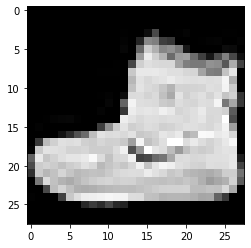

In [23]:
image,label=train[0] ## or sample
plt.imshow(image.squeeze(),cmap='gray')
print('label',label)

##### Work with batches

In [24]:
# instead of using train we are using t_loader or Dataloders
batch=next(iter(t_loader))
images,labels=batch
print(labels)
print(images.shape,labels.shape)

tensor([9, 0, 0, 3, 0, 2, 7, 2, 5, 5, 0, 9, 5, 5, 7, 9, 1, 0, 6, 4, 3, 1, 4, 8,
        4, 3, 0, 2, 4, 4, 5, 3, 6, 6, 0, 8, 5, 2, 1, 6, 6, 7, 9, 5, 9, 2, 7, 3,
        0, 3, 3, 3, 7, 2, 2, 6, 6, 8, 3, 3, 5, 0, 5, 5, 0, 2, 0, 0, 4, 1, 3, 1,
        6, 3, 1, 4, 4, 6, 1, 9, 1, 3, 5, 7, 9, 7, 1, 7, 9, 9, 9, 3, 2, 9, 3, 6,
        4, 1, 1, 8])
torch.Size([100, 1, 28, 28]) torch.Size([100])


torch grid

torch.Size([100, 1, 28, 28])
Label


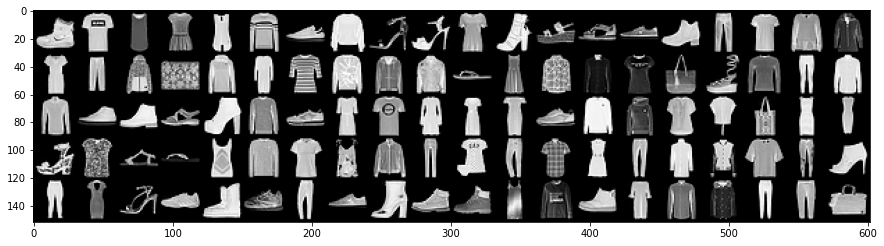

In [25]:
# imshow all batches of images at once using grid
print(images.shape)
grid=torchvision.utils.make_grid(images,nrow=20)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid,(1,2,0)))
print("Label")

### 2.2 Build the Model

In [26]:
import torch.nn as nn

## two components in a layer inside nn
# transformation
# collection of weights

# 1. create a neural network class which extends the nn.nodule base class
# 2. Defile layers as class attribute
# 3. Implement the forward() method

class net(nn.Module):
    def __init__(self,):
        super(net,self).__init__() # extending nn.module base class
        self.layer=None
    def forward(self,t):
        tt=self.layer(t)
        return tt


## module class is keeping track of the weights
# yet this class has single dummy layer as an attribute

Real layer from pytorch instead dummy layer (linke cNN)

In [27]:
class net(nn.Module):
    def __init__(self):
        super(net,self).__init__() # extending nn.module base class
        self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2=nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        
        self.fc1=nn.Linear(in_features=12*4*4,out_features=120)
        self.fc2=nn.Linear(in_features=120,out_features=60)
        self.out=nn.Linear(in_features=60,out_features=10)
    def forward(self,t):
        tt=self.layer(t)
        return tt
Nnet=net()

In [28]:
### To check the structure of the new
#print(help(net))
print(Nnet.conv1)
print(Nnet.conv2)
print(Nnet.fc1)
print(Nnet.fc2)

Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
Linear(in_features=192, out_features=120, bias=True)
Linear(in_features=120, out_features=60, bias=True)


In [29]:
## checking shape of weights
Nnet.conv1.weight.shape
# first axis= Number of filters
# second axis= Depth of each filter (depends on the input)
# 3 & 4 axis = shape

torch.Size([6, 1, 5, 5])

In [30]:
print(Nnet.parameters)

<bound method Module.parameters of net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)>


### 2.2.1 Forward propogation + optim

In [31]:
import torch.nn as nn
import torch.nn.functional as F
import torch
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
torch.set_printoptions(linewidth=120)
## version
print(torch.__version__)
print(torchvision.__version__)

1.6.0
0.7.0


In [32]:
train=torchvision.datasets.FashionMNIST(root="./data/FashionMNIST",train=True,download=True,
                                       transform=transforms.Compose([transforms.ToTensor()]))

In [33]:
def get_n_correct(preds,labels):
    return preds.argmax(dim=1).eq(labels).sum().item()

In [34]:
class net(nn.Module):
    def __init__(self):
        super(net,self).__init__() # extending nn.module base class
        self.conv1=nn.Conv2d(in_channels=1,out_channels=6,kernel_size=5)
        self.conv2=nn.Conv2d(in_channels=6,out_channels=12,kernel_size=5)
        
        self.fc1=nn.Linear(in_features=12*4*4,out_features=120)
        self.fc2=nn.Linear(in_features=120,out_features=60)
        self.out=nn.Linear(in_features=60,out_features=10)
    
    def forward(self,t):
        ## implement forward pass
        # Layer 1: t=t
        
        # Layer 2
        t=self.conv1(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size=2,stride=2)
        
        # Layer 3
        t=self.conv2(t)
        t=F.relu(t)
        t=F.max_pool2d(t,kernel_size=2,stride=2)
        # Layer 4
        t=t.reshape(-1,12*4*4)
        t=self.fc1(t)
        t=F.relu(t)

        # Layer 5
        t=self.fc2(t)
        t=F.relu(t)

        # Out
        t=self.out(t)
        # t=F.softmax(t,dim=1) ## can use
        # 
        return t

#### Train with single batch

In [35]:
Nnet=net()

t_loader=torch.utils.data.DataLoader(train,batch_size=100)
optimizer=optim.Adam(Nnet.parameters(),lr=0.01) ## different types of optimizer: adam and sgd
## parameters are the weights

batch=next(iter(t_loader)) ## unpacking
images,labels=batch

pred=Nnet(images)

loss=F.cross_entropy(pred,labels)
loss.backward() ############# calculate the gradients ########
optimizer.step() ############ update the weight #########

pred=Nnet(images)
loss=F.cross_entropy(pred,labels)

#### Multiple epochs

In [36]:
Nnet=net()

t_loader=torch.utils.data.DataLoader(train,batch_size=100)
optimizer=optim.Adam(Nnet.parameters(),lr=0.01)


for epoch in range(5):
    t_loss=0
    t_correct=0
    for batch in t_loader:
        images,labels=batch

        pred=Nnet(images)
        loss=F.cross_entropy(pred,labels)

        optimizer.zero_grad() ## avoid accumilation of gradients of previous loop
        loss.backward() ############# calculate the gradients ########
        optimizer.step() ############ update the weight #########
        t_loss+=loss.item()
        t_correct+=get_n_correct(pred,labels)
    print("epoch:",epoch+1,"| total loss:",t_loss,"| correct items:",t_correct," out of ", 60000)

epoch: 0 | total loss: 338.3614236712456 | correct items: 47301
epoch: 1 | total loss: 231.45626184344292 | correct items: 51421
epoch: 2 | total loss: 212.86497217416763 | correct items: 52063
epoch: 3 | total loss: 204.66203613579273 | correct items: 52405
epoch: 4 | total loss: 197.88489785790443 | correct items: 52687


In [37]:
### check accuracy
print(t_correct/len(train))

0.8781166666666667


## Confusion Matrix

In [38]:
print(len(train))

60000


In [39]:
def all_prediction(model,loader):
    all_pred=torch.tensor([])
    for batch in loader:
        images,labels=batch
        preds=model(images)
        all_pred=torch.cat((all_pred,preds),dim=0)
    return all_pred

In [40]:
pred_loader=torch.utils.data.DataLoader(train,batch_size=10000)
train_preds=all_prediction(Nnet,pred_loader)

In [41]:
train_preds.shape

torch.Size([60000, 10])

### Turn off gradient tracking

In [42]:
## check
train_preds.requires_grad
## extra overhead

True

In [43]:
with torch.no_grad():
    pred_loader=torch.utils.data.DataLoader(train,batch_size=10000)
    train_preds=all_prediction(Nnet,pred_loader)
train_preds.shape    
## or use @torch.no_grad() before all_prediction function (decorate function)

torch.Size([60000, 10])

Stack both prediction and labels in a stack

In [44]:
stackk=torch.stack((train.targets,train_preds.argmax(dim=1)),dim=1)

In [45]:
c_matrix=torch.zeros(10,10,dtype=torch.int64)
for val in stackk:
    j,k=val.tolist()
    c_matrix[j,k]=c_matrix[j,k]+1

In [46]:
c_matrix

tensor([[5599,    2,   72,  149,   11,    3,  134,    1,   29,    0],
        [  38, 5784,    3,  159,    4,    3,    6,    1,    2,    0],
        [ 110,    9, 4280,  103, 1061,    2,  377,    1,   56,    1],
        [ 246,   28,    4, 5539,  120,    0,   55,    0,    8,    0],
        [  23,   13,  274,  428, 4754,    0,  452,    0,   56,    0],
        [   2,    3,    1,    3,    0, 5613,    0,  283,   10,   85],
        [1788,   18,  544,  196,  549,    1, 2830,    1,   73,    0],
        [   0,    0,    0,    0,    0,   17,    0, 5924,    2,   57],
        [  35,    1,   33,   49,   14,   16,   29,   13, 5807,    3],
        [   0,    0,    0,    8,    0,   13,    0,  439,    5, 5535]])

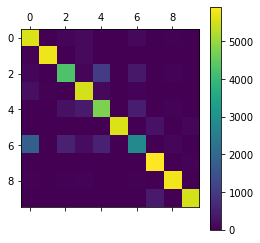

In [47]:
plt.matshow(c_matrix)
plt.colorbar()
plt.show()

In [48]:
print(torch.__version__)
print(torchvision.__version__)

1.6.0
0.7.0


## Tensorboard

use tensorboard --logdir=runs in pytorch directory

In [49]:
from torch.utils.tensorboard import SummaryWriter

In [50]:
#### training with tensorboard
Nnet=net()

tb=SummaryWriter()

images,labels=next(iter(t_loader))
grid=torchvision.utils.make_grid(images)

tb.add_image("images",grid)
tb.add_graph(Nnet,images)
tb.close()

t_loader=torch.utils.data.DataLoader(train,batch_size=100)
optimizer=optim.Adam(Nnet.parameters(),lr=0.01)


for epoch in range(10):
    t_loss=0
    t_correct=0
    for batch in t_loader:
        images,labels=batch

        pred=Nnet(images)
        loss=F.cross_entropy(pred,labels)

        optimizer.zero_grad() ## avoid accumilation of gradients of previous loop
        loss.backward() ############# calculate the gradients ########
        optimizer.step() ############ update the weight #########
        t_loss+=loss.item()
        t_correct+=get_n_correct(pred,labels)
        
    tb.add_scalar('Loss', t_loss, epoch)
    tb.add_scalar('Number Correct', t_correct, epoch)
    tb.add_scalar('Accuracy', t_correct / len(train), epoch)

    tb.add_histogram('conv1.bias', Nnet.conv1.bias, epoch)
    tb.add_histogram('conv1.weight', Nnet.conv1.weight, epoch)
    tb.add_histogram('conv1.weight.grad',Nnet.conv1.weight.grad,epoch)
    print("epoch:",epoch+1,"| total loss:",t_loss,"| correct items:",t_correct," out of ", 60000)
tb.close()

epoch: 0 | total loss: 335.0841243863106 | correct items: 47324
epoch: 1 | total loss: 229.43215061724186 | correct items: 51566
epoch: 2 | total loss: 213.43922033905983 | correct items: 52137
epoch: 3 | total loss: 202.04630641639233 | correct items: 52445
epoch: 4 | total loss: 197.67567867040634 | correct items: 52562
epoch: 5 | total loss: 192.70229543745518 | correct items: 52790
epoch: 6 | total loss: 185.55227084457874 | correct items: 52995
epoch: 7 | total loss: 185.08560110628605 | correct items: 53095
epoch: 8 | total loss: 183.42337694764137 | correct items: 53204
epoch: 9 | total loss: 185.20740470290184 | correct items: 53185
